In [76]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pyl
from matplotlib import pyplot as pyt
import IPython
import itertools

In [2]:
data = pd.read_csv("teleCust1000t.csv")

In [3]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

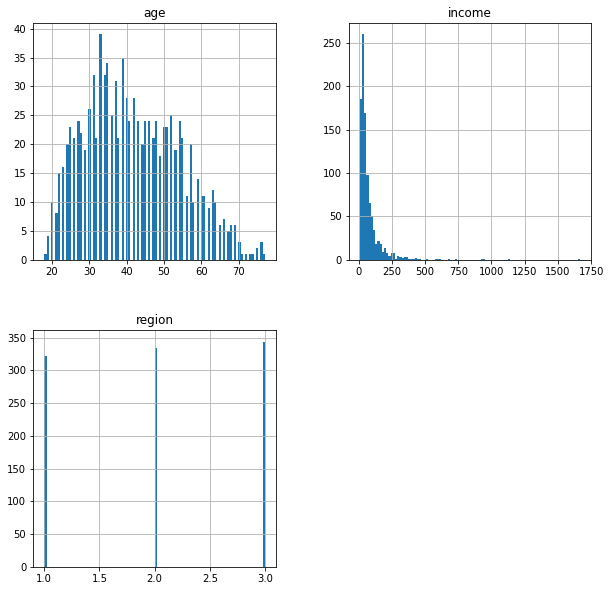

In [6]:
data[['income',"region","age",]].hist(bins=100, figsize=(10,10))
pyt.show()


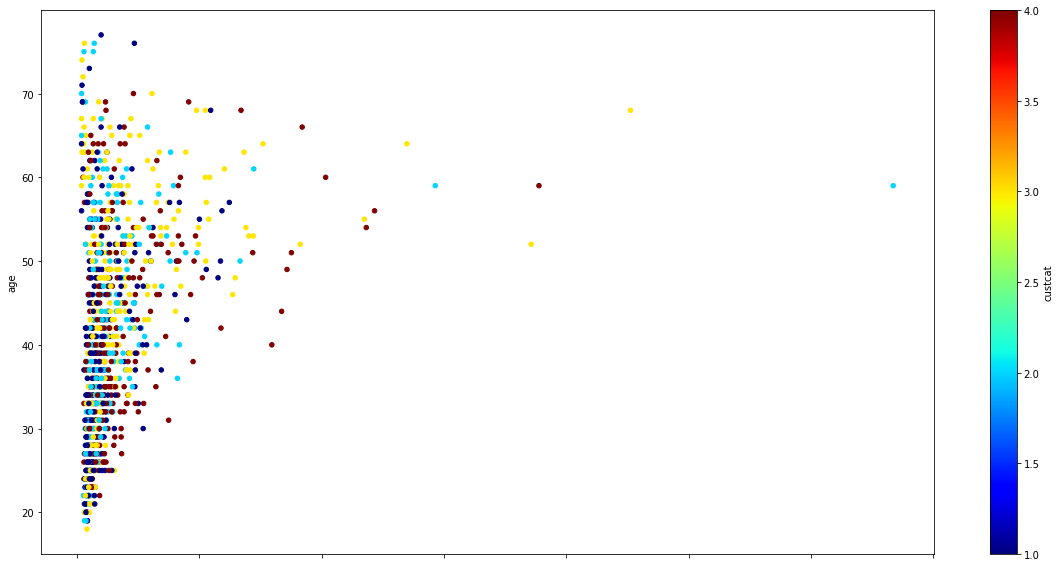

In [7]:
data.plot(kind= "scatter", x= "income", y= "age", figsize= (20,10),c="custcat",cmap=pyt.get_cmap("jet") ,colorbar=True)
pyt.show()


In [8]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [51]:
X = data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values
y = np.array(data[ 'custcat'])

In [52]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [99]:
from sklearn import model_selection
X_train,X_test,y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state= 4)


In [101]:
print ("train shape : ", X_train.shape, y_train.shape)
print( "test shape : ", y_test.shape, y_test.shape)

train shape :  (800, 11) (800,)
test shape :  (200,) (200,)


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
neigh = KNeighborsClassifier(n_neighbors=9).fit(X_train,y_train)
neigh


KNeighborsClassifier(n_neighbors=9)

In [115]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

In [116]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


In [119]:
Ks=15
mean_acc = np.zeros(Ks-1)
std_acc = np.zeros(Ks-1)

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors= n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_hat)
    
    std_acc[n-1] = np.std (y_hat==y_test)/np.sqrt(y_hat.shape[0])
    
mean_acc
std_acc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627, 0.03324906,
       0.03284623, 0.03349627, 0.03324906, 0.03284623])

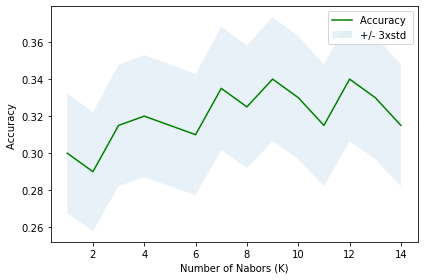

In [121]:
pyt.plot(range(1,Ks),mean_acc,'g')
pyt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
pyt.legend(('Accuracy ', '+/- 3xstd'))
pyt.ylabel('Accuracy ')
pyt.xlabel('Number of Nabors (K)')
pyt.tight_layout()
pyt.show()

In [128]:
max_accuracy = mean_acc.max()
max_accuracy
max_accuracy_location = mean_acc.argmax() + 1
max_accuracy_location

9

In [130]:
print("The maximum accuracy score we get ", max_accuracy," at ", max_accuracy_location)

The maximum accuracy score we get  0.34  at  9
